In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [19]:
model = keras.Sequential([ #We're using 2 hidden layers and one output layer.
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = "sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7716 - loss: 5.0351
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9091 - loss: 0.3544
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9426 - loss: 0.2163
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9524 - loss: 0.1798
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9598 - loss: 0.1521


In [20]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.9533 - loss: 0.1902


[0.16336661577224731, 0.9585000276565552]

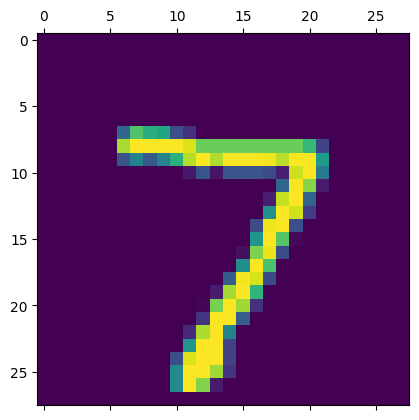

In [28]:
plt.matshow(X_test[0])

In [26]:
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step


np.int64(7)

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
#Converting to concrete class labels

In [35]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

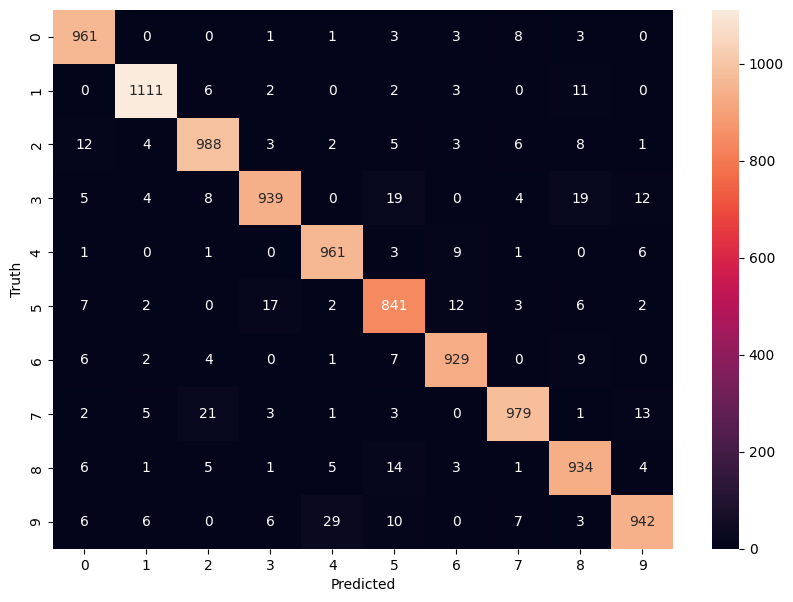

In [37]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')